In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt.risk_models import CovarianceShrinkage
from pypfopt.expected_returns import mean_historical_return
from pypfopt import plotting

In [2]:
# Fetching Daily Historical Price Data
assets = ["SPY", "AGG", "GLD", "DBC", "JNK"]  # ETF tickers
data = yf.download(assets, start="2015-01-01", end="2024-01-01", interval="1d")['Close']

[                       0%                       ]

[*******************   40%                       ]  2 of 5 completed

[**********************60%****                   ]  3 of 5 completed

[**********************80%*************          ]  4 of 5 completed

[*********************100%***********************]  5 of 5 completed

In [3]:
# Resampling Data to Weekly Frequency
weekly_data = data.resample('W-FRI').last()

In [4]:
# Calculating Weekly Returns
returns = np.log(weekly_data / weekly_data.shift(1))

In [5]:
# Computing Expected Returns & Covariance Matrix
mu = mean_historical_return(weekly_data, frequency=52)
S = CovarianceShrinkage(weekly_data).ledoit_wolf()

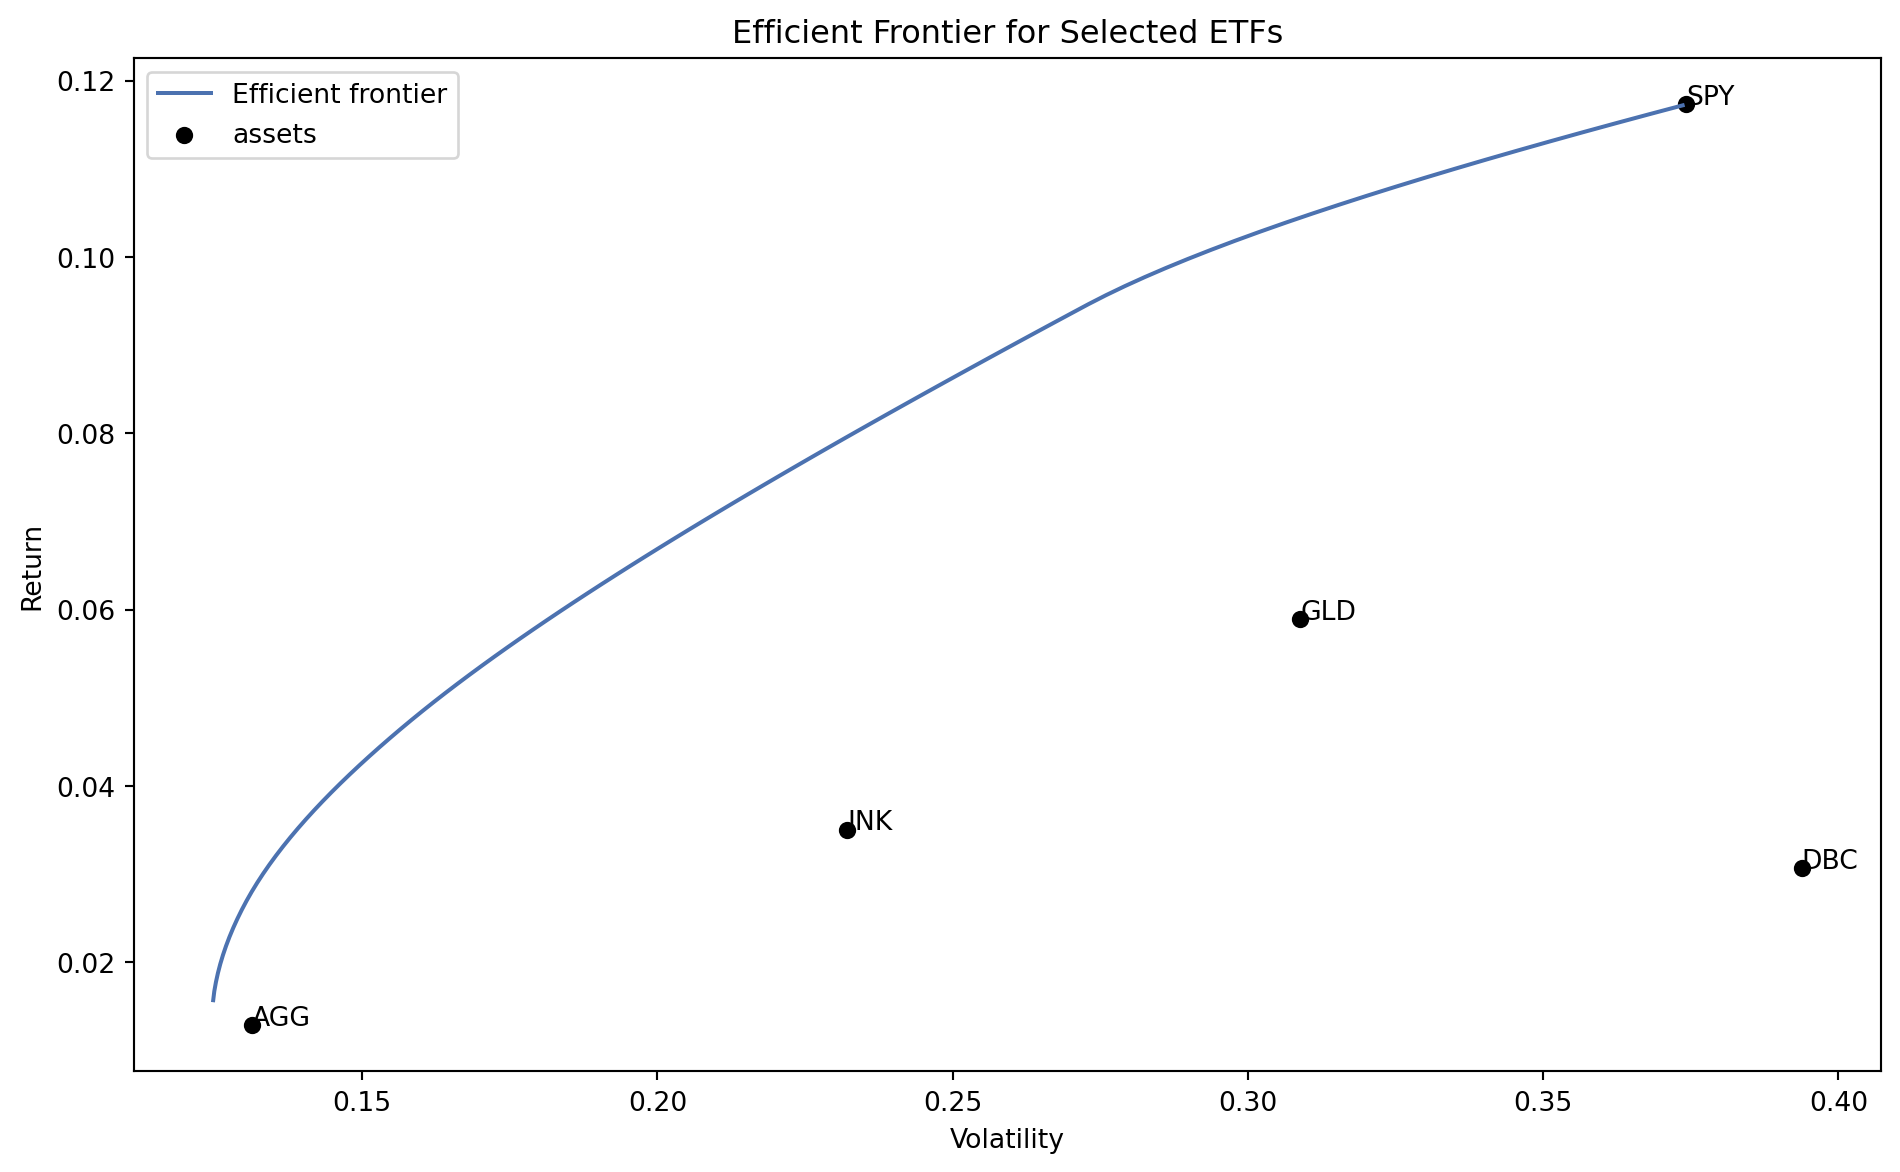

In [6]:
# Instantiate EfficientFrontier
ef = EfficientFrontier(mu, S)

# Plotting the Efficient Frontier with Asset Tickers
fig, ax = plt.subplots(figsize=(10, 6))
plotting.plot_efficient_frontier(ef, ax=ax, show_assets=True, show_tickers=True)
plt.title("Efficient Frontier for Selected ETFs")
plt.show()